# Diabetes Diagnosis Classificator

 ### University of Porto - School of Engineering

 #### Masters in Data Science and Engineering - MECD/FEUP
 
 #### Students: Ian Karkles and Sónia Ferreira

## Approach using CRISP-DM Methodology
### Business Context - Diabetes Classificator

### Data Context - What is the available data and how it's distributed


In [35]:
#Dataset to be used: https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection    import f_classif

In [6]:
df = pd.read_csv('diabetes.csv')
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

# Exploratory Data Analysis - EDA

In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
shape = df.shape #total nr of rows and colums
print(f"Dataframe shape: {shape}")

Dataframe shape: (768, 9)


In [11]:
df.info(verbose=True) #colums and corresponding data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Missing Values

In [12]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

c:\Users\iankk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\iankk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

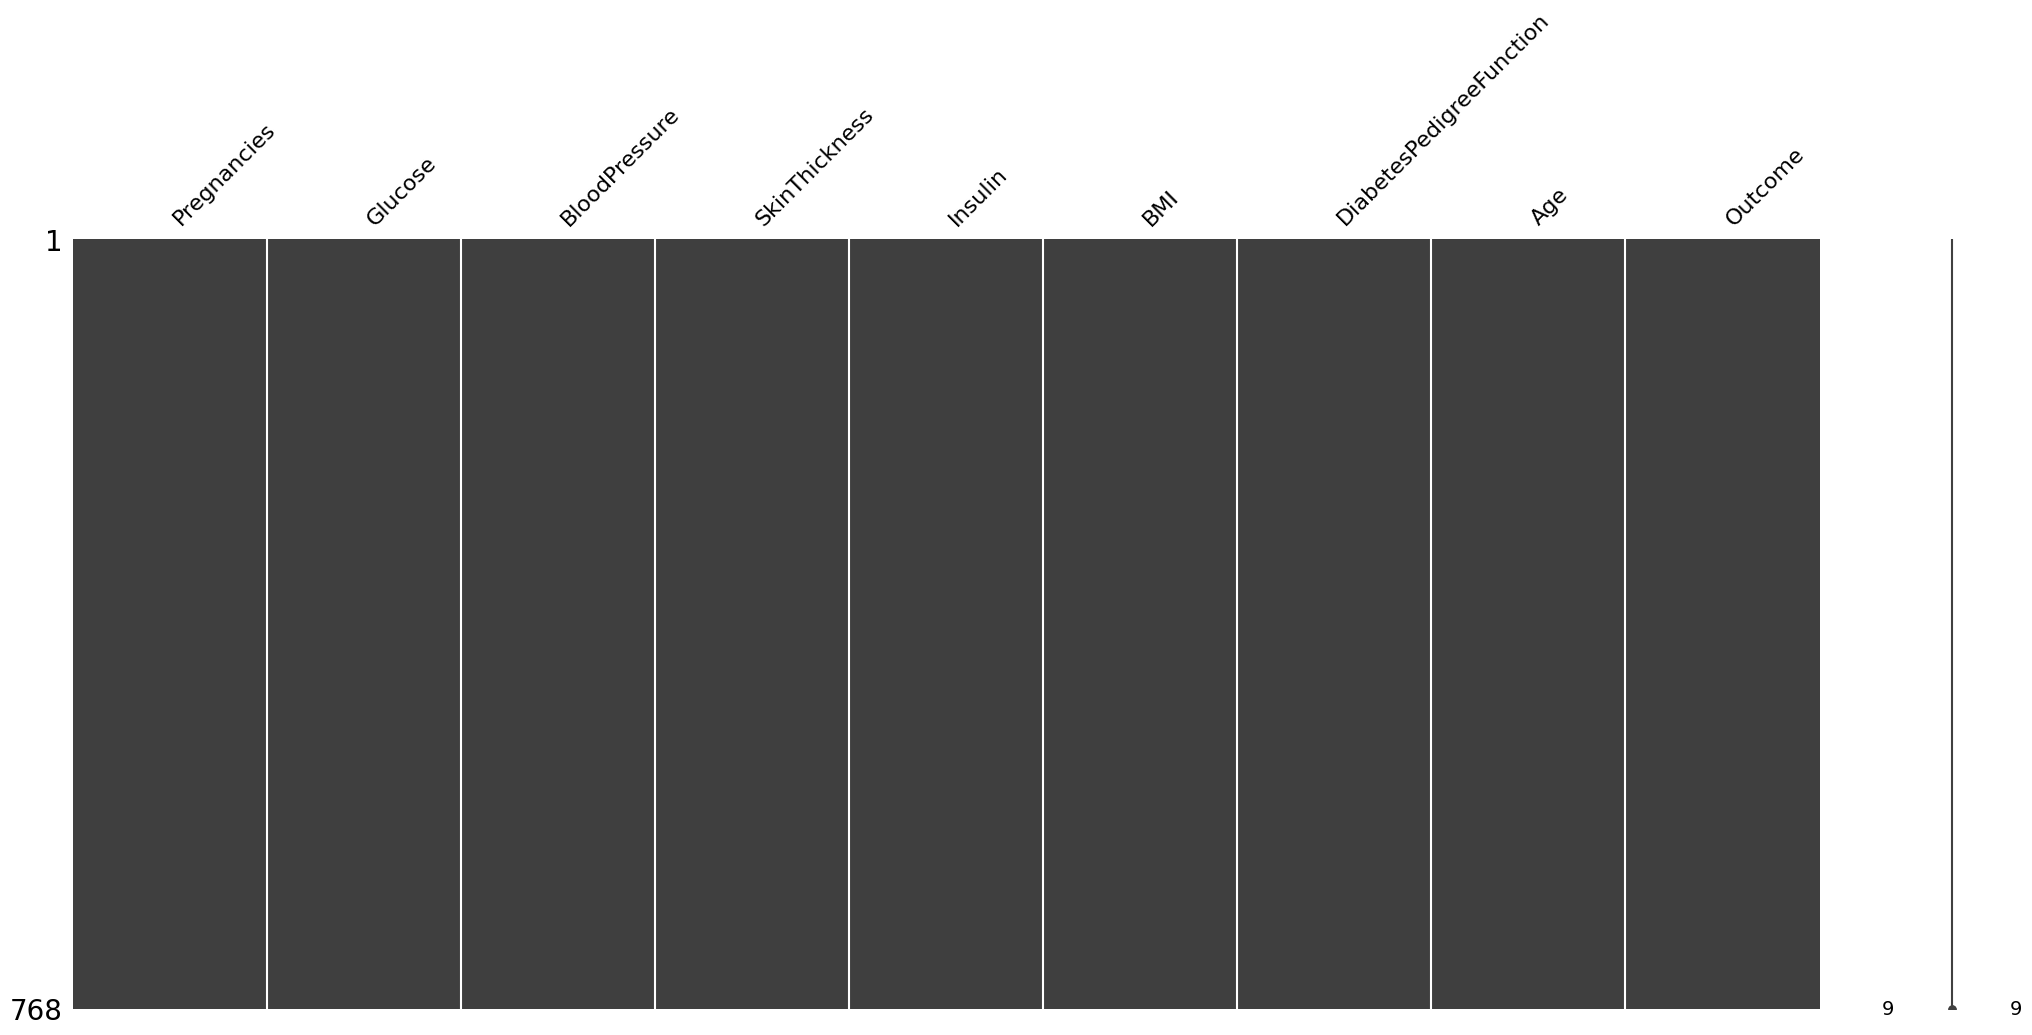

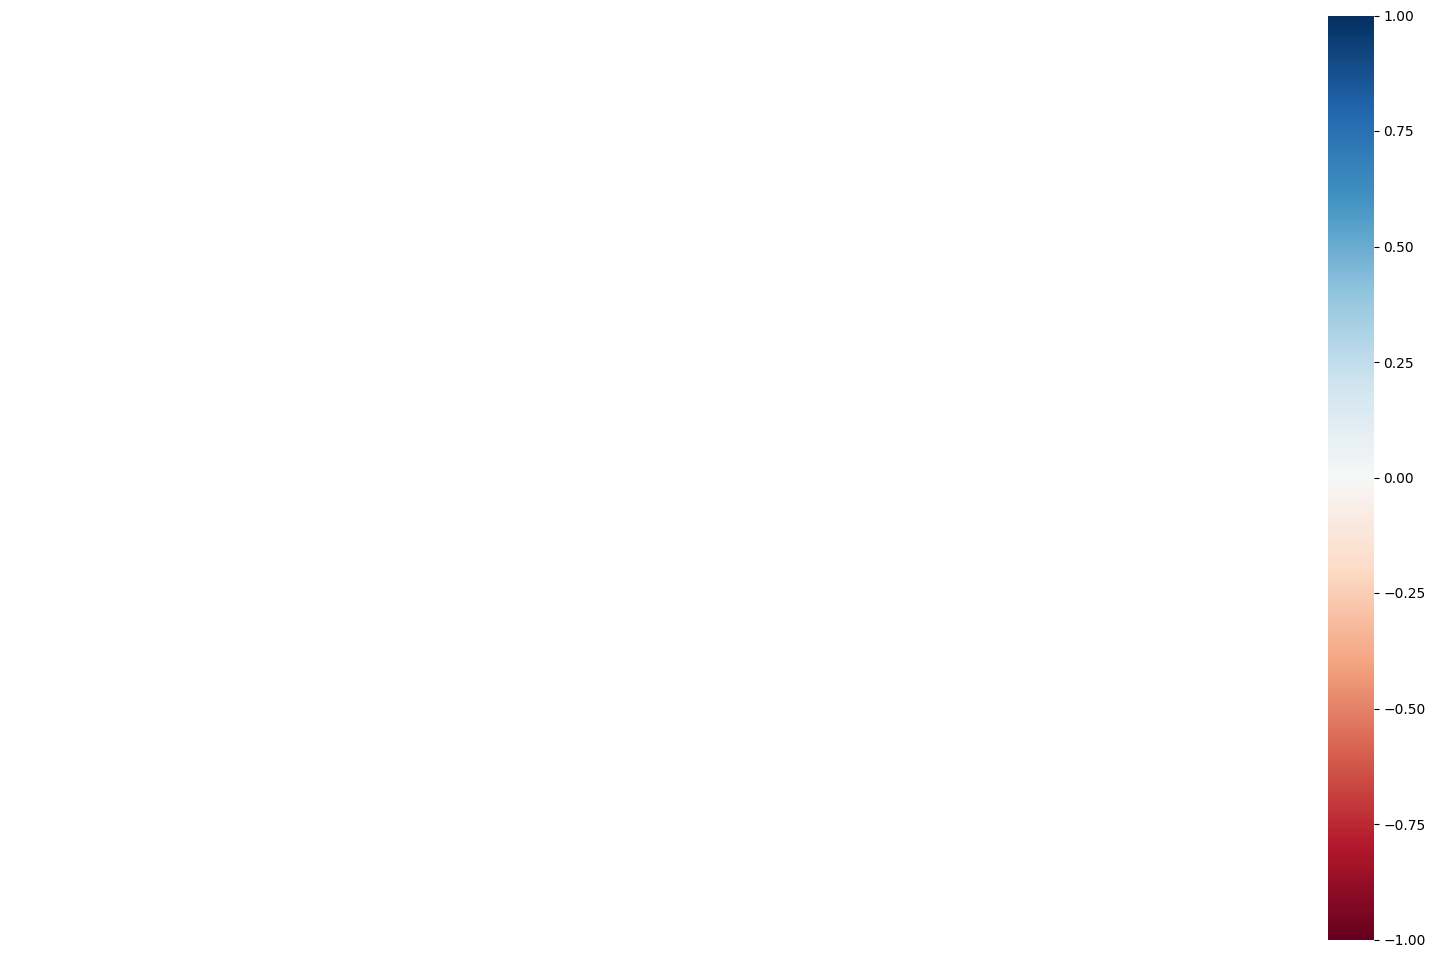

In [16]:
msno.matrix(df)
msno.heatmap(df)

Duplicated Data

In [19]:
df.duplicated().value_counts() # check for duplicate values

False    768
dtype: int64

### Inconsistant data

### Outliers

Statistics of the Dataset

In [21]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

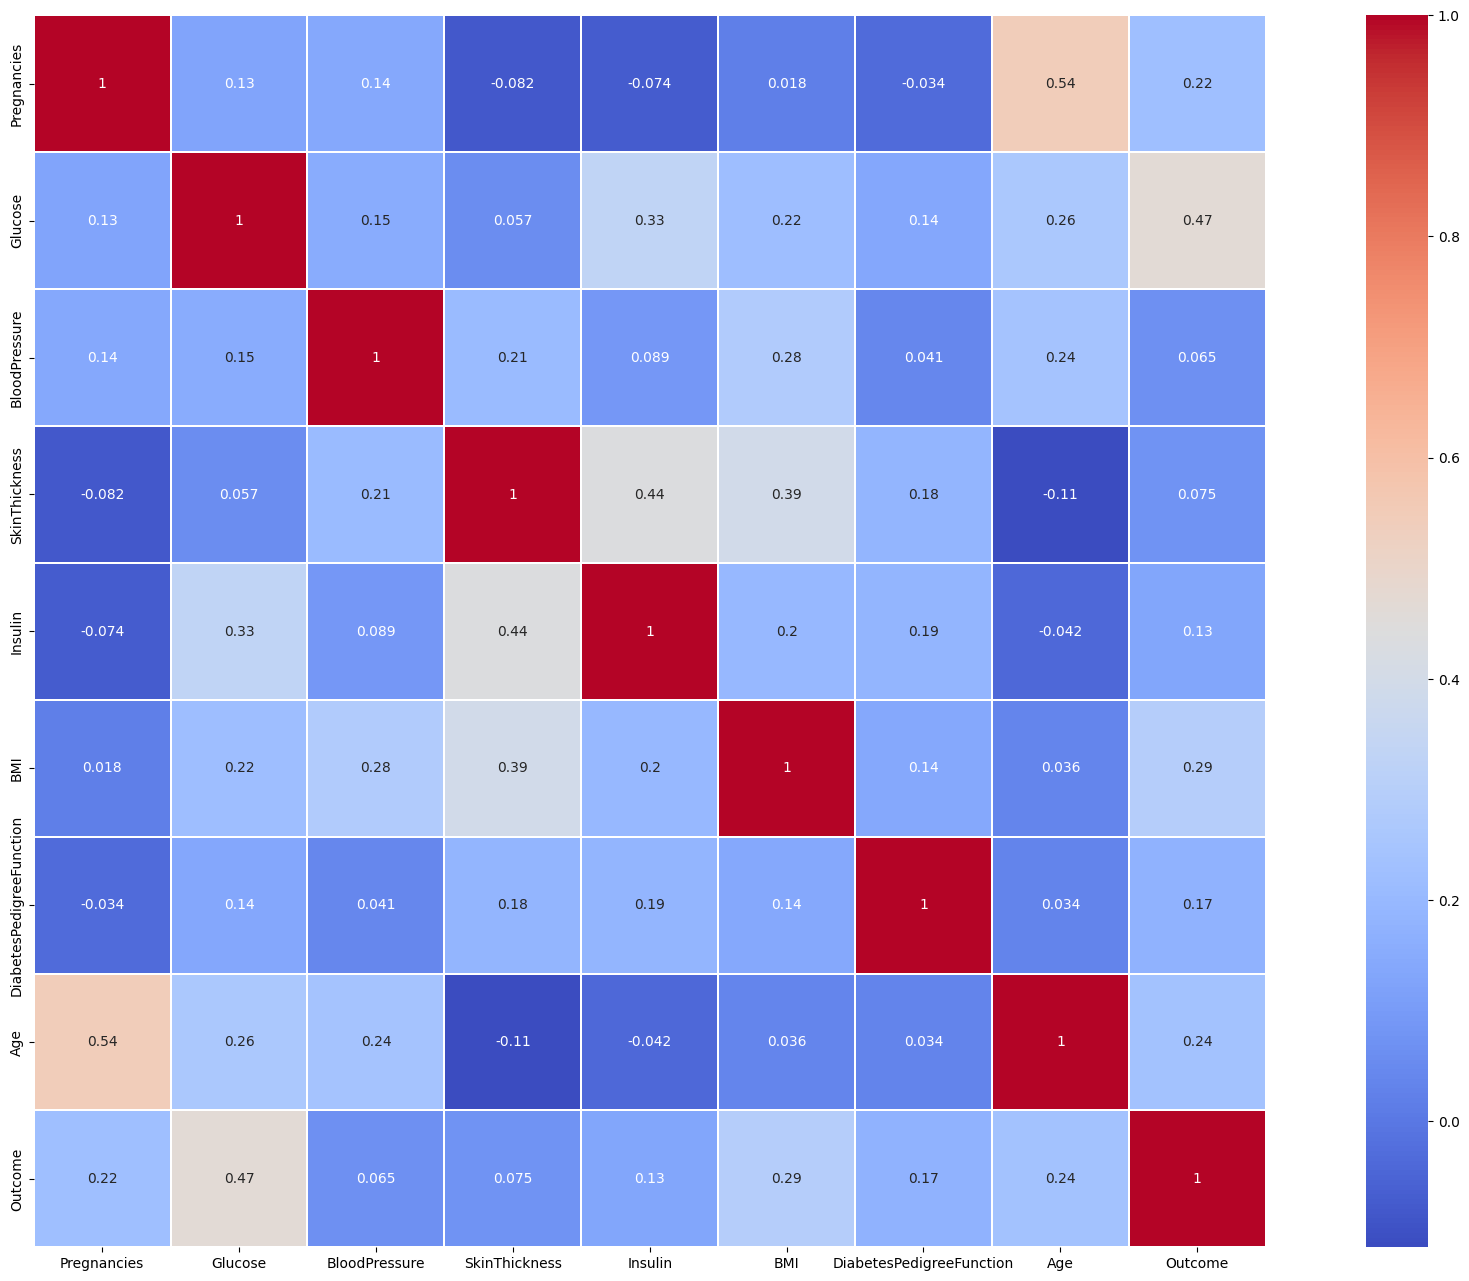

In [24]:
plt.subplots(figsize=(26, 16))
sns.heatmap(df.corr(),  square=True,  annot=True,linewidths=0.1, cmap="coolwarm")
plt.show()

Dicker-Fuller Test

In [25]:
# Testing For Stationarity - Dicker-Fuller test
import statsmodels
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
def adfuller_test(activePower):
    result = adfuller(activePower)
    labels = ['ADF: ','p-value: ','Nr of Lags :','Number of Observations Used  for ADF Regression and Critical Values Calculation :']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), Reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
    
        
adfuller_test(df['Outcome'])

Results of Dickey-Fuller Test:
ADF:  : -27.413007145391102
p-value:  : 0.0
Nr of Lags : : 0
Number of Observations Used  for ADF Regression and Critical Values Calculation : : 767
Strong evidence against the null hypothesis(Ho), Reject the null hypothesis. Data has no unit root and is stationary


In [37]:

x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

selector = SelectKBest(f_classif, k=4)
selector.fit_transform(x, y,)
cols = selector.get_support(indices=True)
df_selected = x.iloc[:,cols]

#scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
df_selected

Pregnancies  Glucose   BMI  Age
0              6      148  33.6   50
1              1       85  26.6   31
2              8      183  23.3   32
3              1       89  28.1   21
4              0      137  43.1   33
..           ...      ...   ...  ...
763           10      101  32.9   63
764            2      122  36.8   27
765            5      121  26.2   30
766            1      126  30.1   47
767            1       93  30.4   23

[768 rows x 4 columns]

In [31]:

x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']